In [1]:
library(pogit)

In [2]:
X <- as.matrix(data.table::fread("/data/GIT/cnv-gene-mapping/data/deletion_simu/block_79_137/deletion.genes.block30.for_simu.sample.genes.block_79_137.gz", header = F))

In [3]:
y <- as.matrix(data.table::fread("/data/GIT/cnv-gene-mapping/data/deletion_simu/deletion.genes.block30.for_simu.sample.y"))

In [4]:
X <- cbind(rep(0, length(y)), X)

In [5]:
y <- as.numeric(y[,1])

In [6]:
N <- rep(1, length(y))

In [7]:
prior <- readRDS("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/deletion.genes.block30.binomial.whole.genome.prior.varbvs.rds")

In [8]:
dim(prior$mu)

[1] 22356    20

In [9]:
length(prior$w)

[1] 20

In [22]:
mean(prior$mu %*% prior$w); mean((prior$mu %*% prior$w)[1216:1274])

[1] 0.02041939

[1] -0.04818214

In [17]:
mu = c(0, prior$mu %*% prior$w[1216:1274])

In [21]:
mean(prior$s %*% prior$w); mean((prior$s %*% prior$w)[1216:1274])

[1] 1.725061

[1] 0.231922

In [15]:
sum(prior$w)

[1] 1

In [16]:
dim(X)

[1] 13412    60

In [18]:
length(var)

[1] 60

In [68]:
res <- logitBvs(y, N, X, prior = list(slab = "Normal", aj0 = rep(0, length(mu)), V = 1.725, w = c(wa0 = 1, wb0 = 1), pi = c(pa0 = 0.02, pb0 = 20)), 
                mcmc = list(M = 1000, burnin = 200, msave = TRUE), BVS = TRUE)


MCMC for the binomial logit model with variable selection:

it = 1 /--- duration of MCMC so far: 28.47 sec.,  expected time to end: Inf  min. 
it = 2 /--- duration of MCMC so far: 28.6 sec.,  expected time to end: 571.46  min. 
it = 3 /--- duration of MCMC so far: 28.74 sec.,  expected time to end: 286.88  min. 
it = 4 /--- duration of MCMC so far: 28.87 sec.,  expected time to end: 191.97  min. 
it = 5 /--- duration of MCMC so far: 29.01 sec.,  expected time to end: 144.57  min. 
it = 10 /--- duration of MCMC so far: 29.66 sec.,  expected time to end: 65.42  min. 
it = 20 /--- duration of MCMC so far: 30.88 sec.,  expected time to end: 31.99  min. 
it = 50 /--- duration of MCMC so far: 34.54 sec.,  expected time to end: 13.52  min. 
it = 100 /--- duration of MCMC so far: 40.62 sec.,  expected time to end: 7.53  min. 
it = 200 /--- duration of MCMC so far: 52.84 sec.,  expected time to end: 4.43  min. 
it = 500 /--- duration of MCMC so far: 89.95 sec.,  expected time to end: 2.11  min

In [73]:
# res <- logitBvs(y, N, X, prior = list(slab = "Normal", aj0 = mu, V = 1.725, w = c(wa0 = 1, wb0 = 1), pi = c(pa0 = 0.02, pb0 = 20)), 
#                 mcmc = list(M = 1000, burnin = 200, msave = TRUE), BVS = FALSE)

In [69]:
names(res)

[1] "samplesL"    "data"        "model.logit" "mcmc"        "prior.logit"
 [6] "dur"         "BVS"         "start"       "family"      "call"

In [70]:
names(res$samplesL)

[1] "alpha"       "pdeltaAlpha" "psiAlpha"    "omegaAlpha"  "deltaAlpha" 
 [6] "thetaAlpha"  "pgammaAlpha" "ai"          "piAlpha"     "gammaAlpha"

In [80]:
dim(res$samplesL$omegaAlpha)

[1] 1200    1

In [90]:
dim(res$samplesL$alpha)

[1] 1200   61

In [97]:
res$samplesL$pdeltaAlpha[1200,]

pdeltaA.1  pdeltaA.2  pdeltaA.3  pdeltaA.4  pdeltaA.5  pdeltaA.6  pdeltaA.7 
0.26886190 0.15817568 0.16911446 0.25306681 0.25444048 0.24305006 0.25306681 
 pdeltaA.8  pdeltaA.9 pdeltaA.10 pdeltaA.11 pdeltaA.12 pdeltaA.13 pdeltaA.14 
0.24843400 0.25306681 0.24938963 0.25306835 0.24934561 0.25195587 0.24305122 
pdeltaA.15 pdeltaA.16 pdeltaA.17 pdeltaA.18 pdeltaA.19 pdeltaA.20 pdeltaA.21 
0.12037570 0.19263448 0.99446602 0.88290152 0.30455067 0.80697977 0.07351910 
pdeltaA.22 pdeltaA.23 pdeltaA.24 pdeltaA.25 pdeltaA.26 pdeltaA.27 pdeltaA.28 
0.13406242 0.13386884 0.79217034 0.27254676 0.29231963 0.27668930 0.27668936 
pdeltaA.29 pdeltaA.30 pdeltaA.31 pdeltaA.32 pdeltaA.33 pdeltaA.34 pdeltaA.35 
0.27675769 0.27123790 0.29233824 0.39363813 0.27668930 0.29231957 0.23693505 
pdeltaA.36 pdeltaA.37 pdeltaA.38 pdeltaA.39 pdeltaA.40 pdeltaA.41 pdeltaA.42 
0.23693503 0.23785554 0.32165233 0.23736100 0.23785554 0.85282613 0.14690356 
pdeltaA.43 pdeltaA.44 pdeltaA.45 pdeltaA.46 pdeltaA.47 pdeltaA.48 pdeltaA.49 
0.08452763 0.40972021 0.98017917 0.22092689 0.22098740 0.21740711 0.21740711 
pdeltaA.50 pdeltaA.51 pdeltaA.52 pdeltaA.53 pdeltaA.54 pdeltaA.55 pdeltaA.56 
0.09382575 0.10288331 0.20997026 0.21003275 0.25330842 0.96728808 0.26744481 
pdeltaA.57 pdeltaA.58 pdeltaA.59 pdeltaA.60 
0.28387227 0.28384509 0.23120073 0.20715040

In [96]:
length(res$samplesL$omegaAlpha)

[1] 1200

In [42]:
summary(res)

MCMC for the logit model:

Call:
logitBvs(y = y, N = N, X = X, prior = list(slab = "Normal", aj0 = mu, 
    V = 1.7), mcmc = list(M = 1000, burnin = 200), BVS = FALSE)


MCMC:
M = 1000 draws after a burn-in of 200
Thinning parameter: 1

Prior: Normal prior [V=1.7]

 a0[0]  a0[1]  a0[2]  a0[3]  a0[4]  a0[5]  a0[6]  a0[7]  a0[8]  a0[9] a0[10] 
 0.000  0.000  0.023 -0.041 -0.251 -0.251 -0.251 -0.251 -0.251 -0.251 -0.251 
a0[11] a0[12] a0[13] a0[14] a0[15] a0[16] a0[17] a0[18] a0[19] a0[20] a0[21] 
-0.251 -0.251 -0.251 -0.251 -0.278 -0.278 -0.372  0.242  0.242  0.144  0.184 
a0[22] a0[23] a0[24] a0[25] a0[26] a0[27] a0[28] a0[29] a0[30] a0[31] a0[32] 
 0.188  0.188  0.144  0.341  0.341  0.341  0.341  0.341  0.274  0.341  0.341 
a0[33] a0[34] a0[35] a0[36] a0[37] a0[38] a0[39] a0[40] a0[41] a0[42] a0[43] 
 0.341  0.341  0.151  0.151  0.151  0.151  0.151  0.151  0.245  0.205  0.134 
a0[44] a0[45] a0[46] a0[47] a0[48] a0[49] a0[50] a0[51] a0[52] a0[53] a0[54] 
 0.360  0.360 -0.543 -0.543 -0.5

In [4]:
data(simul_binomial)

In [5]:
y <- simul_binomial$y
N <- simul_binomial$N
X <- as.matrix(simul_binomial[, -c(1, 2)])

In [14]:
length(y); length(N); dim(X)

[1] 512

[1] 512

[1] 512  10

In [15]:
head(y); head(N)

[1] 16 23 15 19 33 37

[1] 39 40 47 47 54 61

In [16]:
head(X)

X.0,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9
1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,1


In [23]:
sum(X[,1])

[1] 512

In [17]:
m1 <- logitBvs(y = y, N = N, X = X)


MCMC for the binomial logit model with variable selection:

it = 1 /--- duration of MCMC so far: 1.02 sec.,  expected time to end: Inf  min. 
it = 2 /--- duration of MCMC so far: 1.03 sec.,  expected time to end: 171.65  min. 
it = 3 /--- duration of MCMC so far: 1.03 sec.,  expected time to end: 86.23  min. 
it = 4 /--- duration of MCMC so far: 1.04 sec.,  expected time to end: 57.7  min. 
it = 5 /--- duration of MCMC so far: 1.04 sec.,  expected time to end: 43.48  min. 
it = 10 /--- duration of MCMC so far: 1.06 sec.,  expected time to end: 19.57  min. 
it = 20 /--- duration of MCMC so far: 1.09 sec.,  expected time to end: 9.54  min. 
it = 50 /--- duration of MCMC so far: 1.16 sec.,  expected time to end: 3.92  min. 
it = 100 /--- duration of MCMC so far: 1.27 sec.,  expected time to end: 2.12  min. 
it = 200 /--- duration of MCMC so far: 1.57 sec.,  expected time to end: 1.29  min. 
it = 500 /--- duration of MCMC so far: 2.32 sec.,  expected time to end: 0.74  min. 
it = 1000 /--

In [18]:
print(m1)

Bayesian variable selection for the binomial logit model:

Call:
logitBvs(y = y, N = N, X = X)

Model: 512 observations
 Covariates: 9
 --- subject to selection: 9
 Random intercept included: no

MCMC:
M = 8000 draws after a burn-in of 2000
BVS started after 1000 iterations
Thinning parameter: 1

Runtime:
total: 101.8 sec.
since burn-in: 85 sec.

In [19]:
summary(m1)

Bayesian variable selection for the binomial logit model:

Call:
logitBvs(y = y, N = N, X = X)


MCMC:
M = 8000 draws after a burn-in of 2000
BVS started after 1000 iterations
Thinning parameter: 1

Prior:  spike-and-slab prior with Student-t slab [V=5]

a0[0] a0[1] a0[2] a0[3] a0[4] a0[5] a0[6] a0[7] a0[8] a0[9] 
    0     0     0     0     0     0     0     0     0     0 
 w[a]  w[b] pi[a] pi[b] 
    1     1     1     1 


Model averaged posterior means, estimated posterior inclusion
 probabilities and 95%-HPD intervals:

            Estimate P(.=1) 95%-HPD[l] 95%-HPD[u]
(Intercept)   -0.452     NA     -0.549     -0.366
alpha.1        0.180  1.000      0.124      0.236
alpha.2       -0.141  1.000     -0.197     -0.086
alpha.3        0.044  0.569      0.000      0.117
alpha.4       -1.077  1.000     -1.135     -1.018
alpha.5       -0.003  0.083     -0.037      0.000
alpha.6        0.000  0.045      0.000      0.000
alpha.7        1.152  1.000      1.096      1.213
alpha.8       -0.077

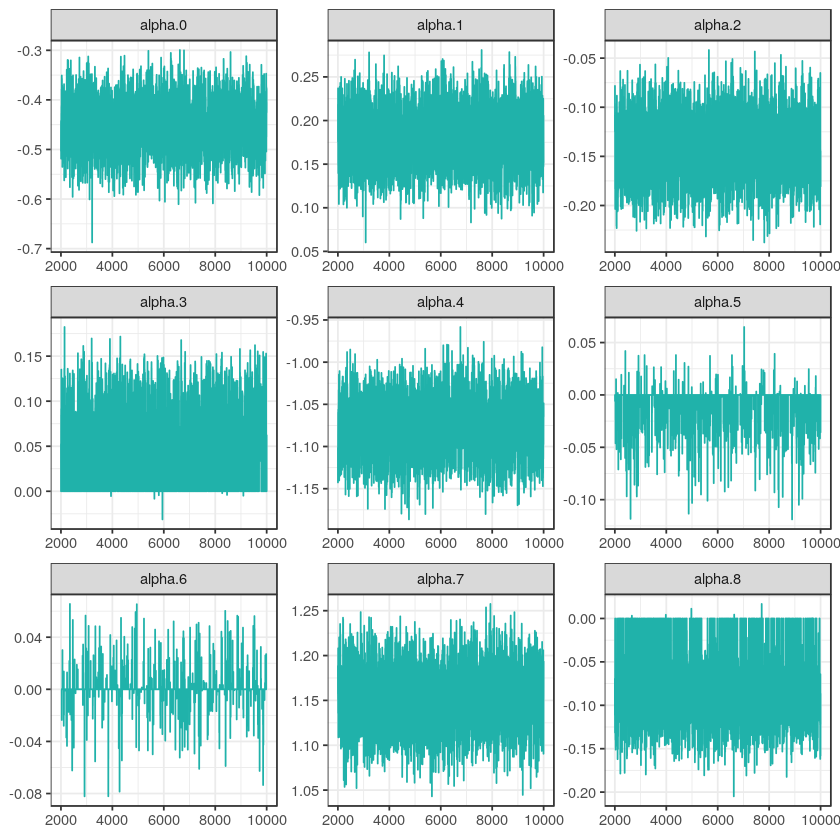

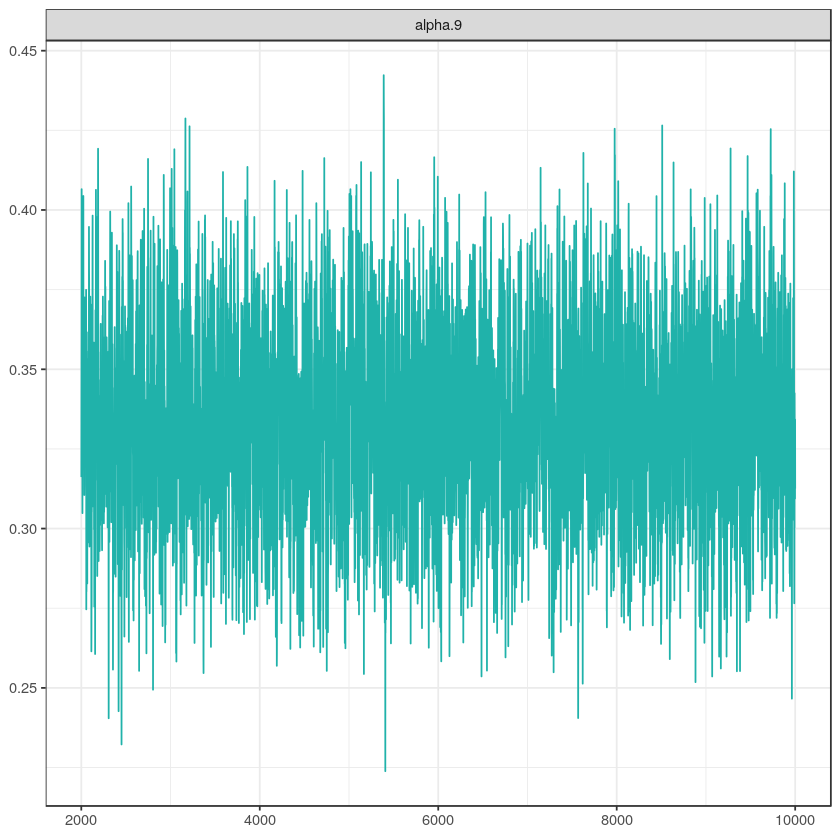

In [20]:
plot(m1)